In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [20]:
import os
for dirname, _, filenames in os.walk('/home/snekha/datasets/mri_images'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [21]:
# !pip3 install opencv-python

In [22]:
DATADIR = '/home/snekha/datasets/mri_images'
CATEGORIES = ['healthy','enlarged_ventricles','brain_shrinkage']
IMG_SIZE=100

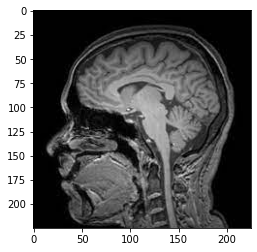

In [23]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [24]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()   

In [25]:
print(len(training_data))

1511


In [26]:
lenofimage = len(training_data)

In [27]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [31]:
# categories

array([[[101, 101, 101],
        [ 96,  96,  96],
        [ 93,  93,  93],
        ...,
        [ 97,  97,  97],
        [ 97,  97,  97],
        [ 96,  96,  96]],

       [[  6,   6,   6],
        [ 13,  13,  13],
        [  3,   3,   3],
        ...,
        [  7,   7,   7],
        [  6,   6,   6],
        [  5,   5,   5]],

       [[  0,   0,   0],
        [  1,   1,   1],
        [ 10,  10,  10],
        ...,
        [  1,   1,   1],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  9,   9,   9],
        [ 26,  26,  26],
        [ 19,  19,  19],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[  1,   1,   1],
        [  8,   8,   8],
        [  5,   5,   5],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]]

In [32]:
X.shape

(1511, 30000)

In [33]:
X = X/255.0

In [34]:
X[1]

array([0.90980392, 0.90980392, 0.90980392, ..., 0.90980392, 0.90980392,
       0.90980392])

In [35]:
y=np.array(y)

In [36]:
y.shape

(1511,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [38]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [39]:
y2 = svc.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.455026455026455


In [41]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.45      0.61      0.51       113
           1       0.42      0.45      0.43       124
           2       0.53      0.33      0.41       141

    accuracy                           0.46       378
   macro avg       0.46      0.47      0.45       378
weighted avg       0.47      0.46      0.45       378



In [42]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [43]:
result

,original,predicted
0,0,0
1,2,0
2,2,1
3,2,1
4,1,2
...,...,...
373,2,2
374,1,1
375,0,0
376,2,0
